<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>


<center><h2 style="color: #03396c;">SERIE: ANÁLISIS DE COTIZACIONES EN BOLSA - ACCIONES DE ARGOS</h2></center>

<span style="color: #03396c;">**Autor:**</span>
- Cesar Prieto


<h2 style="color: #03396c;">INTRODUCCION</h2>

La base de datos fue tomada de la pagina _https://es.investing.com/equities/grupoargos-historical-data_ la cual proporciona estos datos de manera gratuita al publico, la inspiracion para desarrollar este trabajo con esta base es conocer como se comportan los metodos aprendidos en clase en un enfoque econocimo y sobre todo en el area de las acciones, con lo cual decidimos tomar los datos de un grupo empresarial Colombiano y realizar el analisis correspondiente para desarrollar el proyecto para la clase de series de tiempo. 

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Acciones <span style="color: #03396c;">**DIARIAS**</span> del Grupo ARGOS
- 3401 Datos tomado (Desde el 7/11/20114 Hasta 28/02/2024)
- Variables: Fecha, Último, <span style="color: #03396c;">**_Apertura_**</span>, Máximo, Mínimo, Vol, %Var.

In [1]:
# Color2  <span style="color: #03396c;"></span>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

Paquetes necesarios para el desarrollo del problema

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
current_dir = os.getcwd()
pro_series_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
pro_series_dir

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series'

In [9]:
# Construir la ruta a la carpeta de Datos
data_folder_path = os.path.join(pro_series_dir, 'Datos')
data_folder_path = data_folder_path + os.sep
data_folder_path

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Datos\\'

In [10]:
# Cargar el archivo CSV en un DataFrame de pandas
ARGOS = pd.read_csv(data_folder_path + "G_ARGOS.csv", sep=';')

In [11]:
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     2440 non-null   datetime64[ns]
 1   Último    2440 non-null   object        
 2   Apertura  2440 non-null   object        
 3   Máximo    2440 non-null   object        
 4   Mínimo    2440 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 95.4+ KB
          Fecha     Último   Apertura     Máximo     Mínimo
0    2019-12-30  17.800,00  18.280,00  18.280,00  17.800,00
1    2019-12-27  18.300,00  18.120,00  18.400,00  18.040,00
2    2019-12-26  18.120,00  18.240,00  18.340,00  18.060,00
3    2019-12-24  18.340,00  18.220,00  18.780,00  18.200,00
4    2019-12-23  18.880,00  18.360,00  18.960,00  18.360,00
...         ...        ...        ...        ...        ...
2435 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00
2436 2010-01-07  19.980,00  19.7

In [12]:
FC = pd.DataFrame({'Fecha': pd.date_range(start=ARGOS['Fecha'].min(), end=ARGOS['Fecha'].max(), freq='D')})
FC.info()
print(FC)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   3648 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.6 KB
          Fecha
0    2010-01-04
1    2010-01-05
2    2010-01-06
3    2010-01-07
4    2010-01-08
...         ...
3643 2019-12-26
3644 2019-12-27
3645 2019-12-28
3646 2019-12-29
3647 2019-12-30

[3648 rows x 1 columns]


In [13]:
# Combinar DataFrame de fechas completas con datos existentes
ARGOS = pd.merge(FC, ARGOS, on='Fecha', how='left')

# Rellenar los valores faltantes usando el último valor conocido (last observation carried forward)
# Rellenar los valores faltantes usando el método ffill() 
ARGOS['Último'] = ARGOS['Último'].ffill()
ARGOS['Apertura'] = ARGOS['Apertura'].ffill()
ARGOS['Máximo'] = ARGOS['Máximo'].ffill()
ARGOS['Mínimo'] = ARGOS['Mínimo'].ffill()

ARGOS.info()
ARGOS.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   object        
 2   Apertura  3648 non-null   object        
 3   Máximo    3648 non-null   object        
 4   Mínimo    3648 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 142.6+ KB


Fecha     Último   Apertura     Máximo     Mínimo
0 2010-01-04  18.980,00  18.980,00  19.700,00  18.980,00
1 2010-01-05  19.560,00  19.500,00  19.560,00  19.100,00
2 2010-01-06  19.780,00  19.400,00  19.780,00  19.360,00
3 2010-01-07  19.980,00  19.700,00  19.980,00  19.700,00
4 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00

In [14]:
# Convertir la columna de fecha al formato de fecha
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

# Convertir las comas en puntos en las columnas numéricas
columnas_numericas = ['Último', 'Apertura', 'Máximo', 'Mínimo']
# Eliminar los puntos de los números antes de convertirlos a float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace(r'\,', '.', regex=True)
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace(r'\.', '', regex=True)

# Convertir las columnas numéricas al tipo float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].astype(float)

# Dividir entre 1000 para eliminar los ceros adicionales
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].div(100000)

# Reordenar el DataFrame por fecha de la más antigua a la más reciente
ARGOS = ARGOS.sort_values(by='Fecha')

# Reiniciar el índice
ARGOS = ARGOS.reset_index(drop=True)

In [15]:
ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   float64       
 2   Apertura  3648 non-null   float64       
 3   Máximo    3648 non-null   float64       
 4   Mínimo    3648 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 142.6 KB
          Fecha  Último  Apertura  Máximo  Mínimo
0    2010-01-04   18.98     18.98   19.70   18.98
1    2010-01-05   19.56     19.50   19.56   19.10
2    2010-01-06   19.78     19.40   19.78   19.36
3    2010-01-07   19.98     19.70   19.98   19.70
4    2010-01-08   20.30     19.70   20.30   19.70
...         ...     ...       ...     ...     ...
3643 2019-12-26   18.12     18.24   18.34   18.06
3644 2019-12-27   18.30     18.12   18.40   18.04
3645 2019-12-28   18.30     18.12   18.40   18.04
3646 2019-1

Hasta este punto solo hemos preparado nuestros datos, asegurandonos que las variables tuvieran el tipo correcto de dato, y para una exploracion más sencilla la conversion o el reescalado de las variables numericas que respresentan un valor de la accion, las cuales son: _Último, Apertura, Máximo y Mínimo_, este reescalado mencionado consiste en eliminar los miles "000", es decir 3 ceros, de los valores obtenidos.

A continuacion nos disponemos a revisar como se verian las series de estas variables.

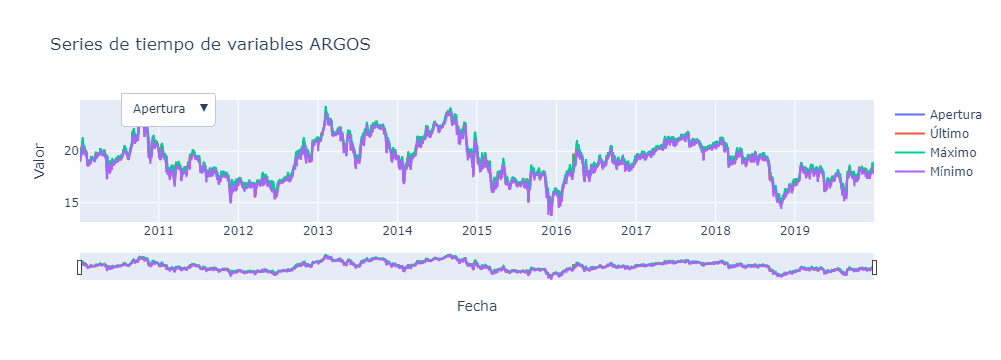

In [16]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Último'], mode='lines', name='Último'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Máximo'], mode='lines', name='Máximo'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Mínimo'], mode='lines', name='Mínimo'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Apertura",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Serie de tiempo variable Apertura"}]),
                dict(label="Último",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Serie de tiempo variable Último"}]),
                dict(label="Máximo",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Serie de tiempo variable Máximo"}]),
                dict(label="Mínimo",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Serie de tiempo variable Mínimo"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables ARGOS')

# Mostrar el gráfico
fig.show()

Del gafico anterio podemos conlcuir que todas las variables se comportan de manera similar en el tiempo explorado, por lo cual la eleccion de la variable en la que nos centraremos no tendra una influencia positiva o negativa en nuestro estudio, sin embargo podemos notar que entre el 2021 y 2022 hubo una caida muy brusca del precio de las acciones del grupo ARGOS lo cual si podra afectar de manera directa los resultados que obtengamos.

In [17]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]

# Crear una serie de tiempo con Pandas Time Series (ts)
Apertura = pd.Series(Serie['Apertura'].values, index=Serie['Fecha'])

<h3 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA ESTABILIZACION DE LA VARIANZA</h3>

In [18]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [19]:
# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(ARGOS['Apertura'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Apertura, lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.17071798004770206
[3.82402513 3.86880216 3.86026874 ... 3.7476868  3.7476868  3.76211352]


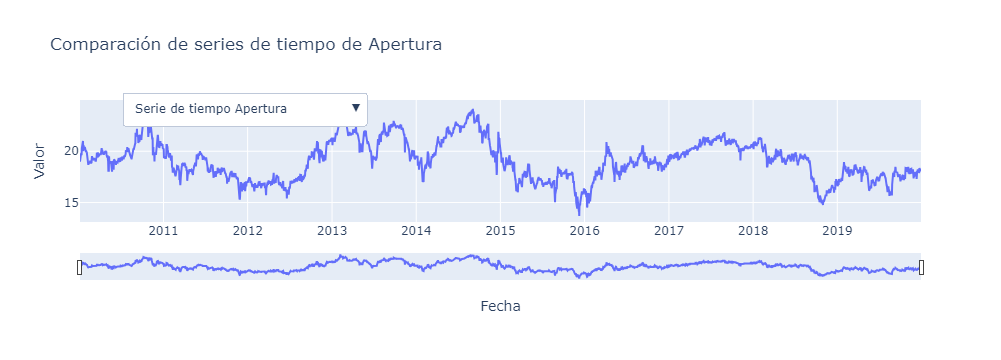

In [20]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Serie de tiempo Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=serie_boxcox, mode='lines', name='Serie de tiempo Apertura-BoxCox', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo Apertura",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Serie de tiempo Apertura"}]),
                dict(label="Serie de tiempo Apertura-BoxCox",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Serie de tiempo Apertura-BoxCox"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo de Apertura')

# Mostrar el gráfico
fig.show()

A partir de este punto intentaremos mostrar los resultados para ambas series teniendo en cuenta los datos en su escala original y los datos en escala log, esto con la intencion de tener una comparacion más directa sobre lo que puede causar la tranformacion de los datos en los resultados de nuestro ejercicio.

In [21]:
original_data = ARGOS["Apertura"]

<h3 style="color: #011f4b;">ESTIMACION DE LA TENDENCIA USANDO REGRESION KERNEL</h3>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg

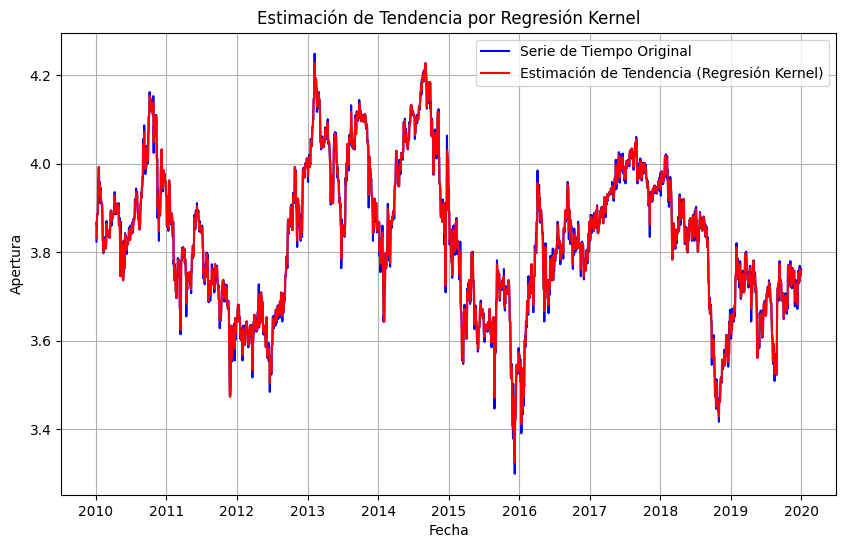

In [23]:
# Suponiendo que ya tienes definida la serie de tiempo ARGOS['Apertura']

# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': serie_boxcox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# Preprocesamiento de datos
# Eliminar filas con valores faltantes
df_BoxCox.dropna(inplace=True)

# Ajuste de regresión kernel para estimar la tendencia
dates = df_BoxCox.index.to_julian_date()  # Convertir las fechas a días julianos para facilitar el ajuste kernel
values = df_BoxCox['BoxCox'].values

# Ajustar regresión kernel con un kernel gaussiano y un ancho de banda automático
try:
    kernel_reg = KernelReg(values, dates, var_type='c', reg_type='lc', bw='cv_ls')  # 'c' para variable continua
    trend_kernel, _ = kernel_reg.fit()
    
    # Graficar la serie de tiempo original y la tendencia estimada por regresión kernel
    plt.figure(figsize=(10, 6))
    plt.plot(df_BoxCox.index, df_BoxCox['BoxCox'], label='Serie de Tiempo Original', color='blue')
    plt.plot(df_BoxCox.index, trend_kernel, label='Estimación de Tendencia (Regresión Kernel)', color='red')
    plt.xlabel('Fecha')
    plt.ylabel('Apertura')
    plt.title('Estimación de Tendencia por Regresión Kernel')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error en la estimación de la tendencia por regresión kernel: {e}")


In [24]:
# Serie sin tendencia (remover la tendencia estimada por regresión kernel)
sin_tendencia_kernel = df_BoxCox['BoxCox'] - trend_kernel

<h3 style="color: #011f4b;">VALIDACION DEL MODELO KERNEL PROPUESTO</h3>

In [29]:
from scipy.stats import shapiro

# Prueba de normalidad Shapiro-Wilk
stat, p = shapiro(residuals)
print(f'Estadístico de Shapiro-Wilk: {stat}, p-valor: {p}')


Estadístico de Shapiro-Wilk: 0.9197878693147682, p-valor: 2.3986685249372534e-40


<h3 style="color: #011f4b;">INDICE DE INFORMAICON MUTUA (AMI) </h3>

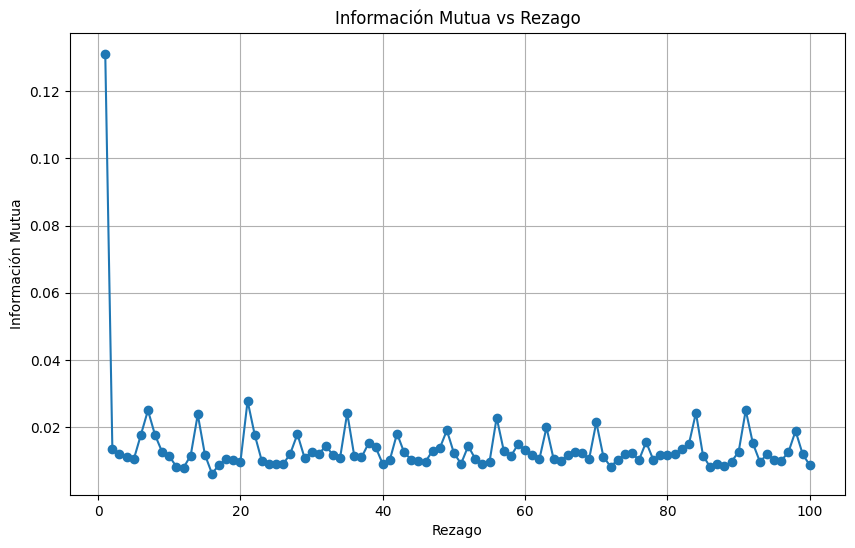

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    mi = entropy_x + entropy_y - entropy_xy
    return mi

# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [mutual_information(sin_tendencia_kernel[:-lag], sin_tendencia_kernel[lag:]) for lag in lag_values]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(10, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

In [25]:
# Selección de rezagos con alta MI para modelado
high_mi_lags = [lag for lag, mi in zip(lag_values, mutual_info_values) if mi > np.mean(mutual_info_values)]
print(high_mi_lags)

[1, 6, 7, 8, 14, 21, 22, 28, 32, 35, 38, 39, 42, 49, 52, 56, 59, 63, 70, 77, 83, 84, 91, 92, 98]


Notamos que los rezagos semanales tienen una importancia superior en términos de MI para la serie, es decir, esto sugiere tomar aquellos rezagos en orden de 7 días, es decir, los rezagos 7 (Semanal), 14 (Quincenal), 21, 28 (Mensual), 35 y de esa manera consecutivamente. 

<h3 style="color: #011f4b;">DETECCION DE ESTACIONALIDAD</h3>

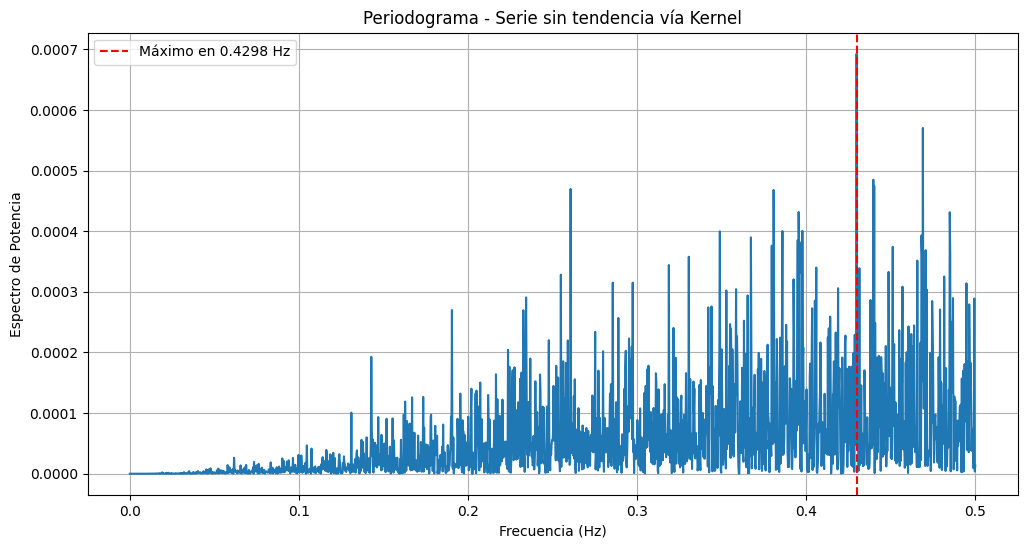

Frecuencia dominante: 0.43
Periodo dominante: 2.33 unidades de tiempo


In [53]:
from scipy.signal import periodogram

# Calcular el periodograma (espectro de potencia) de la serie diferenciada
frequencies, spectrum = periodogram(sin_tendencia_kernel)

# Encontrar la frecuencia correspondiente al máximo del espectro
max_frequency = frequencies[np.argmax(spectrum)]
periodo = 1 / max_frequency

# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum)
plt.axvline(max_frequency, color='red', linestyle='--', label=f'Máximo en {max_frequency:.4f} Hz')
plt.title('Periodograma - Serie sin tendencia vía Kernel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el periodo correspondiente a la frecuencia máxima
print(f'Frecuencia dominante: {max_frequency:.2f}')
print(f'Periodo dominante: {periodo:.2f} unidades de tiempo')

Esto indica que la serie sin tendencia tiene un ciclo dominante que se repite aproximadamente cada 2.33 unidades de tiempo. Como nuestros datos están en días, esto sugiere una periodicidad de aproximadamente 2.33 días o dicho de una forma más general la serie posee un ciclo dominante de entre 2 y 3 días 

<center><h1 style="color: #011f4b;">ÁRBOLES DE DEDICIÓN SERIE ORIGINAL</h1></center>

Para esta seccion nos proponemos a realizar el analisis a partir de la metodologia de "Arboles de decision" la cual en el contexto de series de temporales nos permiten tener las siguiente herramientas para el analisis: 

- Prediccion de tendencia futuras: Los árboles de decisión pueden ayudar a identificar relaciones complejas entre variables y predecir cómo evolucionará una serie temporal en el futuro.
- Modelado de dependencias temporales: Las series de tiempo suelen estar influenciadas por eventos pasados y tendencias históricas. Los árboles de decisión pueden manejar estas dependencias temporales al considerar múltiples puntos de tiempo como características de entrada.
- Flexibilidad en el tratamiento de datos no lineales: Las series de tiempo pueden exhibir comportamientos no lineales y cambios abruptos. Los árboles de decisión son capaces de modelar relaciones no lineales y segmentar el espacio de características de manera adaptativa.

<h2 style="color: #011f4b;">PREPARACION DE LA SERIE</h2>

In [26]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [27]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]
Serie.size

7296

In [28]:
SerieTs = pd.Series(ARGOS['Apertura'].values, index = ARGOS['Fecha'])
SerieDf = pd.DataFrame(ARGOS['Apertura'].values, index = ARGOS['Fecha'])
type(SerieTs)
SerieTs.info()
print(SerieTs)
#type(SerieDf)

<class 'pandas.core.series.Series'>
DatetimeIndex: 3648 entries, 2010-01-04 to 2019-12-30
Series name: None
Non-Null Count  Dtype  
--------------  -----  
3648 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB
Fecha
2010-01-04    18.98
2010-01-05    19.50
2010-01-06    19.40
2010-01-07    19.70
2010-01-08    19.70
              ...  
2019-12-26    18.24
2019-12-27    18.12
2019-12-28    18.12
2019-12-29    18.12
2019-12-30    18.28
Length: 3648, dtype: float64


In [29]:
df1 = pd.DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [30]:
for i in range(10, 0, -1):
    df1['t-'+str(i)] = SerieTs.shift(i)

for i in range(370, 364, -1):
    df1['t-'+str(i)] = SerieTs.shift(i)

# Imprimir el DataFrame resultante
print(df1)

             t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3    t-2  \
Fecha                                                                       
2010-01-04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-05    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-06    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  18.98   
2010-01-07    NaN    NaN    NaN    NaN    NaN    NaN    NaN  18.98  19.50   
2010-01-08    NaN    NaN    NaN    NaN    NaN    NaN  18.98  19.50  19.40   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2019-12-26  18.24  18.06  17.92  18.14  17.96  17.96  17.96  18.36  18.22   
2019-12-27  18.06  17.92  18.14  17.96  17.96  17.96  18.36  18.22  18.22   
2019-12-28  17.92  18.14  17.96  17.96  17.96  18.36  18.22  18.22  18.24   
2019-12-29  18.14  17.96  17.96  17.96  18.36  18.22  18.22  18.24  18.12   
2019-12-30  17.96  17.96  17.96  18.36  18.22  18.22  18.24  18.12  18.12   

In [31]:
# Create column t
df1['t'] = SerieTs.values
print(df1.head(13))

             t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3    t-2  \
Fecha                                                                       
2010-01-04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-05    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-06    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  18.98   
2010-01-07    NaN    NaN    NaN    NaN    NaN    NaN    NaN  18.98  19.50   
2010-01-08    NaN    NaN    NaN    NaN    NaN    NaN  18.98  19.50  19.40   
2010-01-09    NaN    NaN    NaN    NaN    NaN  18.98  19.50  19.40  19.70   
2010-01-10    NaN    NaN    NaN    NaN  18.98  19.50  19.40  19.70  19.70   
2010-01-11    NaN    NaN    NaN  18.98  19.50  19.40  19.70  19.70  19.70   
2010-01-12    NaN    NaN  18.98  19.50  19.40  19.70  19.70  19.70  19.70   
2010-01-13    NaN  18.98  19.50  19.40  19.70  19.70  19.70  19.70  19.70   
2010-01-14  18.98  19.50  19.40  19.70  19.70  19.70  19.70  19.70  20.30   

In [32]:
df2 = df1[370:]
print(df2)
df2.size

             t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3    t-2  \
Fecha                                                                       
2011-01-09  20.20  20.20  20.20  20.20  19.40  19.50  19.36  19.52  19.36   
2011-01-10  20.20  20.20  20.20  19.40  19.50  19.36  19.52  19.36  19.36   
2011-01-11  20.20  20.20  19.40  19.50  19.36  19.52  19.36  19.36  19.36   
2011-01-12  20.20  19.40  19.50  19.36  19.52  19.36  19.36  19.36  19.36   
2011-01-13  19.40  19.50  19.36  19.52  19.36  19.36  19.36  19.36  19.26   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2019-12-26  18.24  18.06  17.92  18.14  17.96  17.96  17.96  18.36  18.22   
2019-12-27  18.06  17.92  18.14  17.96  17.96  17.96  18.36  18.22  18.22   
2019-12-28  17.92  18.14  17.96  17.96  17.96  18.36  18.22  18.22  18.24   
2019-12-29  18.14  17.96  17.96  17.96  18.36  18.22  18.22  18.24  18.12   
2019-12-30  17.96  17.96  17.96  18.36  18.22  18.22  18.24  18.12  18.12   

55726

In [33]:
# Split data
df3 = df2.values
X1= df3[:, 0:-1]  
y1 =df3[:,-1]  
print(X1)
print(y1)

[[20.2  20.2  20.2  ... 19.7  19.7  19.7 ]
 [20.2  20.2  20.2  ... 19.7  19.7  19.7 ]
 [20.2  20.2  19.4  ... 19.7  19.7  19.7 ]
 ...
 [17.92 18.14 17.96 ... 16.72 17.28 17.04]
 [18.14 17.96 17.96 ... 17.28 17.04 17.04]
 [17.96 17.96 17.96 ... 17.04 17.04 17.04]]
[19.36 19.36 19.26 ... 18.12 18.12 18.28]


In [34]:
print(X1[1])
print(y1[1])

[20.2  20.2  20.2  19.4  19.5  19.36 19.52 19.36 19.36 19.36 19.5  19.4
 19.7  19.7  19.7  19.7 ]
19.36


In [35]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 3278
2294 327 655
Train + Validation + Test: 3276


In [36]:
Y1 = y1
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 3278
Training Observations for Target: 2294
Validation Observations for Target: 328
Test Observations for Target: 656


In [37]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 3278
Training Observations for Feature: 2294
Validation Observations for Feature: 328
Test Observations for Feature: 656


In [38]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = DecisionTreeRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: 0.562012136525317
el RECM sobre validación es: 0.13475000000000004


- El R^2 = 1 indica que el modelo está ajustando perfectamente a los datos de entrenamiento, esto significa que el modelo puede explicar el 100% de la variabilidad en este conjunto; sin embargo, esto puede ser señal de sobre ajuste
- El R^2 en el conjunto de validación es considerablemente más bajo que en el conjunto de entrenamiento (0.594 vs 1.0). Esto sugiere que el modelo no generaliza bien a nuevos datos. Aunque todavía está capturando una cantidad significativa de variabilidad (alrededor del 59.4%), la caída en el desempeño comparado con el conjunto de entrenamiento es un indicio de que el modelo podría estar sobre ajustado.
- El RECM (Raíz del Error Cuadrático Medio) es una medida de la magnitud promedio del error de las predicciones del modelo en el conjunto de validación. Un RECM más bajo indica mejores predicciones. En este caso, el RECM de 0.124789 sugiere que, en promedio, las predicciones del modelo están desviándose en alrededor de 0.125 unidades del valor real en el conjunto de validación.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convertir val_target a una serie de pandas
val_target_series = pd.Series(val_target)

# Calcular la media y desviación estándar
train_mean = np.mean(train_target)
train_std = np.std(train_target)
val_mean = np.mean(val_target)
val_std = np.std(val_target)

print(f"Media de entrenamiento: {train_mean}")
print(f"Desviación estándar de entrenamiento: {train_std}")
print(f"Media de validación: {val_mean}")
print(f"Desviación estándar de validación: {val_std}")

Media de entrenamiento: 19.094341761115952
Desviación estándar de entrenamiento: 2.0140630853131958
Media de validación: 20.70701219512195
Desviación estándar de validación: 0.5546683032953543


El hecho de que el RECM del modelo (0.124789) sea significativamente menor que la desviación estándar de la validación (0.554668) y menor que el RECM del modelo de persistencia (0.199976) indica que el modelo está capturando bien la variabilidad de los datos.

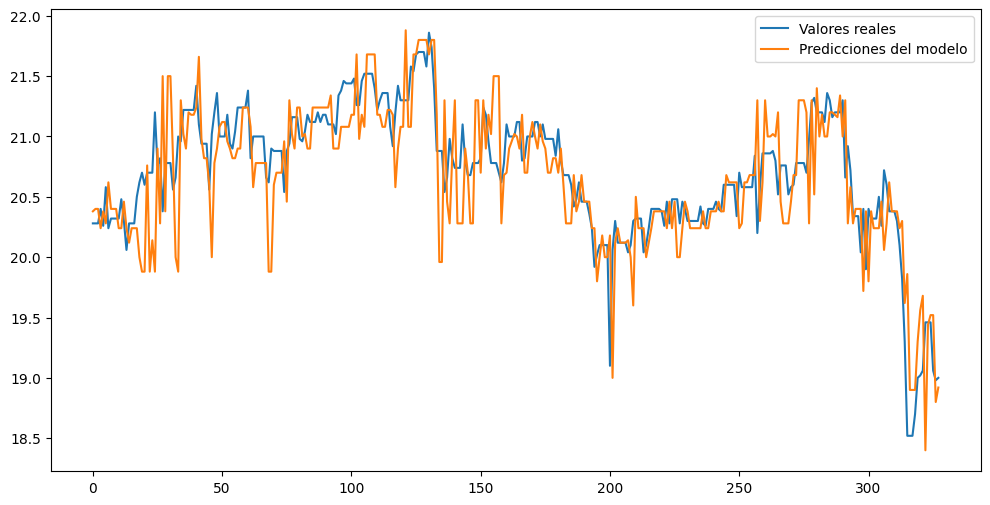

In [40]:
val_predictions = DT_Apertura.predict(val_feature)

plt.figure(figsize=(12, 6))
plt.plot(val_target, label='Valores reales')
plt.plot(val_predictions, label='Predicciones del modelo')
plt.legend()
plt.show()

In [41]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un DataFrame para almacenar los resultados
tuning_results = pd.DataFrame(columns=['max_depth', 'steps', 'R2_train', 'R2_val', 'RMSE_val'])

# Definir los valores de max_depth y pasos que deseas probar
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9]
steps_ahead = [1, 2, 3, 4, 5, 6, 7]

# Función para crear características para pasos adelante
def create_lagged_features(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps)])
        y.append(data[i + steps])
    return np.array(X), np.array(y)

for steps in steps_ahead:
    best_rmse = float('inf')
    best_model = None
    best_params = None
    
    for depth in max_depth_values:
        print(f'{"="*12} Entrenando el modelo con max_depth={depth} y {steps} pasos adelante {"="*12}')
        
        # Crear características y objetivos para el número de pasos adelante
        train_X, train_y = create_lagged_features(train_feature.flatten(), steps)
        val_X, val_y = create_lagged_features(val_feature.flatten(), steps)

        # Crear y ajustar el modelo
        AperturaDT = DecisionTreeRegressor(max_depth=depth)
        AperturaDT.fit(train_X, train_y)

        # Evaluar el modelo
        R2_train = AperturaDT.score(train_X, train_y)
        R2_val = AperturaDT.score(val_X, val_y)
        RMSE_val = mean_squared_error(val_y, AperturaDT.predict(val_X), squared=False)

        # Almacenar los mejores resultados
        if RMSE_val < best_rmse:
            best_rmse = RMSE_val
            best_model = AperturaDT
            best_params = (depth, steps, R2_train, R2_val, RMSE_val)

    # Almacenar los mejores resultados en el DataFrame usando loc
    tuning_results.loc[len(tuning_results)] = best_params
    print(f"Mejor modelo para {steps} pasos adelante:")
    print(f"max_depth={best_params[0]}")
    print(f"Coeficiente R2 sobre el conjunto de entrenamiento: {best_params[2]}")
    print(f"Coeficiente R2 sobre el conjunto de validación: {best_params[3]}")
    print(f"RECM sobre el conjunto de validación: {best_params[4]}\n")

# Mostrar los resultados finales
print("Resultados del tuning de max_depth y pasos adelante:")
print(tuning_results)

============ Entrenando el modelo con max_depth=2 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=3 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=4 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=5 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=6 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=7 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=8 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=9 y 1 pasos adelante ============
Mejor modelo para 1 pasos adelante:
max_depth=5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7258372561279605
Coeficiente R2 sobre el conjunto de validación: 0.5108791079165946
RECM sobre el conjunto de validación: 0.7101132303133104

============ Entrenando el modelo con max_depth=2 y 2 pasos adelante ============
============ Entren

En nuestro caso, tenemos resultados muy similares en los modelos ajustados hasta 7 pasos adelante, y de estos el mejor encontrado basándonos en aquel que tuviese menor RMSE fue aquel que utiliza un max_depth de 5 en 4 pasos adelante.

In [42]:
# Importar la función para poda por complejidad de costo
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Obtener el mejor modelo encontrado
best_max_depth = 5  # Cambiar según el mejor resultado obtenido
best_steps = 4      # Cambiar según el mejor resultado obtenido

# Crear y ajustar el modelo con el mejor max_depth y steps
AperturaDT = DecisionTreeRegressor(max_depth=best_max_depth)
train_X, train_y = create_lagged_features(train_feature.flatten(), best_steps)
val_X, val_y = create_lagged_features(val_feature.flatten(), best_steps)
AperturaDT.fit(train_X, train_y)

# Obtener el camino de poda por complejidad de costo
path = AperturaDT.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Imprimir las alphas encontradas
print("Alphas encontradas:", ccp_alphas)
print("Alpha mínimo:", ccp_alphas.min())
print("Alpha máximo:", ccp_alphas.max())

# Definir el número de divisiones para explorar las alphas
div = 25

Alphas encontradas: [0.00000000e+00 2.14265051e-04 2.66677117e-04 3.61632044e-04
 5.22477033e-04 6.69802287e-04 6.94956828e-04 9.10074591e-04
 1.00005659e-03 1.19801698e-03 1.77609322e-03 1.91854557e-03
 2.02644776e-03 2.93101345e-03 3.14383959e-03 3.55632879e-03
 4.01613791e-03 4.59822619e-03 5.30353243e-03 5.50304865e-03
 9.09540720e-03 1.03606546e-02 1.19381413e-02 1.26732007e-02
 1.58840863e-02 2.14131449e-02 3.46690182e-02 6.72045096e-02
 7.85091903e-02 2.10552525e-01 4.11156346e-01 2.12727650e+00]
Alpha mínimo: 0.0
Alpha máximo: 2.1272764966452105


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Obtener el camino de poda por complejidad de costo
path = AperturaDT.cost_complexity_pruning_path(train_feature, train_target)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Lista para almacenar los RMSE de entrenamiento y prueba
rmse_train, rmse_test = [], []

# Iterar sobre los valores de alpha
for alpha in ccp_alphas:
    # Crear y ajustar el modelo con el valor de alpha actual
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(train_feature, train_target)
    
    # Predecir sobre conjunto de entrenamiento y validación
    y_train_pred = tree.predict(train_feature)
    y_val_pred = tree.predict(val_feature)

    # Calcular el RMSE
    rmse_train.append(np.sqrt(mean_squared_error(train_target, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(val_target, y_val_pred)))

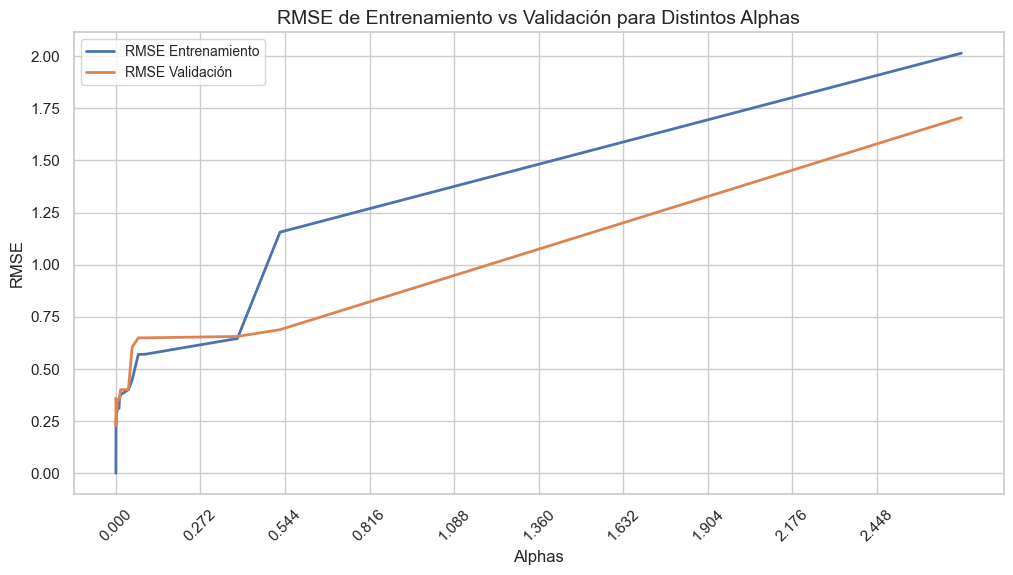

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura y un eje de tamaño adecuado
plt.figure(figsize=(12, 6))

# Graficar las líneas de entrenamiento y prueba
sns.lineplot(x=ccp_alphas, y=rmse_train, label="RMSE Entrenamiento", linewidth=2)
sns.lineplot(x=ccp_alphas, y=rmse_test, label="RMSE Validación", linewidth=2)

# Personalizar etiquetas y título
plt.xlabel("Alphas", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE de Entrenamiento vs Validación para Distintos Alphas", fontsize=14)

# Configurar la leyenda
plt.legend(fontsize=10)

# Ajustar las marcas del eje x para que sean más legibles
div = 10  # Divisor para determinar la cantidad de marcas en el eje x
plt.xticks(np.arange(0.00, ccp_alphas.max(), (ccp_alphas.max() - ccp_alphas.min()) / div), rotation=45)

# Mostrar el gráfico
plt.show()

Este gráfico nos indica como varía la precisión del modelo  en los datos de prueba y entrenamiento a medida que cambian los valores de alpha. Al ver que las curvas o las líneas son ascendente para ambos conjuntos podemos concluir que el modelo mejora su rendimiento al aumentar los valores de alpha, al parecer no existe una brecha significativa por lo que podemos inferir que no existe un sobre ajuste en el modelo.

In [95]:
0.544 - 0.272

0.272

In [45]:
####
print(train_feature.shape)
print(val_feature.shape)

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)

(2294, 16)
(328, 16)
(2294,)
(328,)
(2622, 16)
(2622,)


In [46]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth
AperturaDT2 = DecisionTreeRegressor(max_depth=5)  

# Ajustar el modelo con los datos de entrenamiento y validación combinados
AperturaDT2.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction = AperturaDT2.predict(train_val_feature)
test_prediction = AperturaDT2.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse = sklearn.metrics.mean_squared_error(train_val_prediction, train_val_target, squared=False)
test_rmse = sklearn.metrics.mean_squared_error(test_prediction, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse)


Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 0.24851285962739428
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.2509049922593522


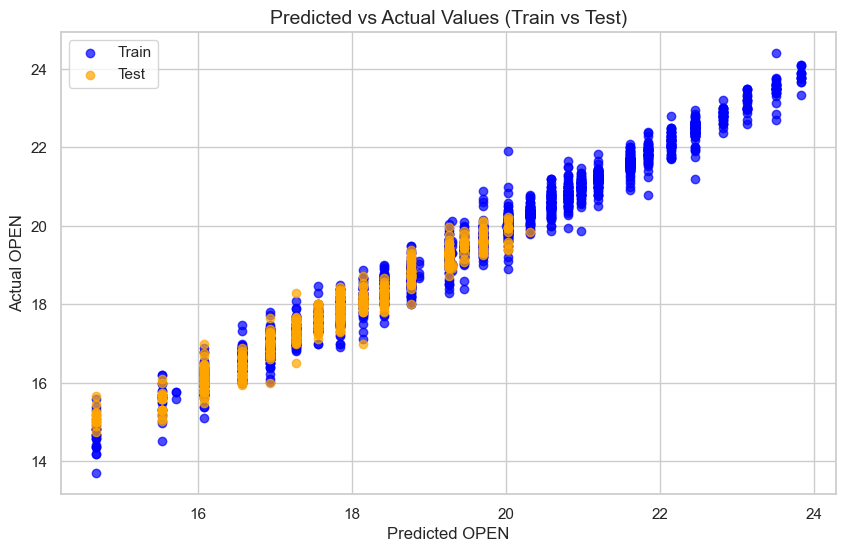

In [47]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=14)
plt.xlabel('Predicted OPEN', fontsize=12)
plt.ylabel('Actual OPEN', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()

In [48]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth 
AperturaDT3 = DecisionTreeRegressor(ccp_alpha=0.272)  # Rellena aquí el mejor alpha de poda

# Ajustar el modelo con los datos de entrenamiento y validación combinados
AperturaDT3.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction_prun_mincost = AperturaDT3.predict(train_val_feature)
test_prediction_prun_mincost = AperturaDT3.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse_prun_mincost = sklearn.metrics.mean_squared_error(train_val_prediction_prun_mincost, train_val_target, squared=False)
test_rmse_prun_mincost = sklearn.metrics.mean_squared_error(test_prediction_prun_mincost, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse_prun_mincost)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse_prun_mincost)


Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 0.6389683793847745
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.6973766916037065


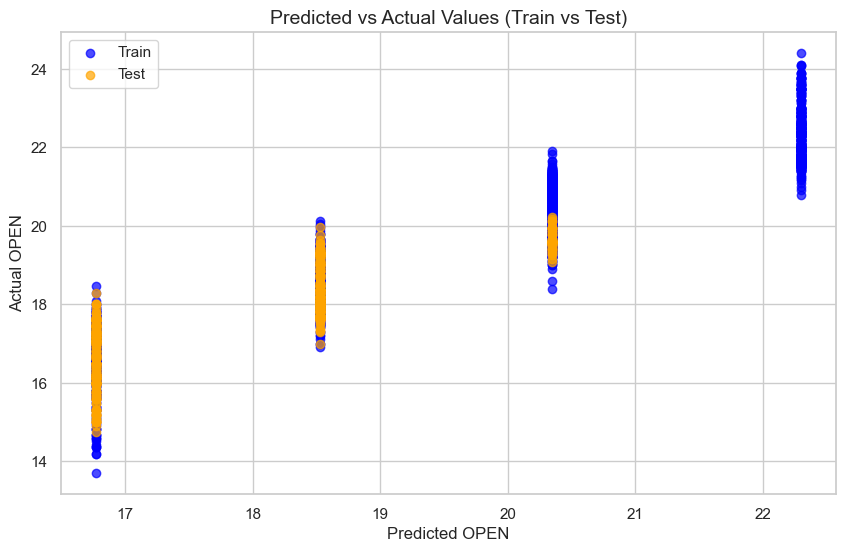

In [49]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction_prun_mincost, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction_prun_mincost, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=14)
plt.xlabel('Predicted OPEN', fontsize=12)
plt.ylabel('Actual OPEN', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()

La conclusión para esta parte es que resulta mejor utilizar el max_depth = 5 con los 4 pasos adelante, que guiarnos por el alpha, dado que para este modelo se muestra menor RMSE en ambos conjuntos

In [50]:
from sklearn import tree
import matplotlib.pyplot as plt

# Lista de características y respuesta
listacaract = list(df1.columns.values)
respuesta = listacaract.pop()  # Suponemos que 'respuesta' es el nombre de la columna que quieres predecir

# Crear el árbol de decisión
AperturaDT1 = DecisionTreeRegressor(max_depth= 5)  # Aquí debes definir tu modelo DecisionTreeRegressor
AperturaDT1.fit(df1[listacaract], df1[respuesta])

# Mostrar el texto de representación del árbol
text_representation = tree.export_text(AperturaDT1)
print(text_representation)

|--- feature_9 <= 19.03
|   |--- feature_9 <= 17.41
|   |   |--- feature_9 <= 16.31
|   |   |   |--- feature_9 <= 15.71
|   |   |   |   |--- feature_9 <= 15.02
|   |   |   |   |   |--- value: [14.77]
|   |   |   |   |--- feature_9 >  15.02
|   |   |   |   |   |--- value: [15.45]
|   |   |   |--- feature_9 >  15.71
|   |   |   |   |--- feature_9 <= 16.06
|   |   |   |   |   |--- value: [15.97]
|   |   |   |   |--- feature_9 >  16.06
|   |   |   |   |   |--- value: [16.24]
|   |   |--- feature_9 >  16.31
|   |   |   |--- feature_9 <= 16.97
|   |   |   |   |--- feature_9 <= 16.69
|   |   |   |   |   |--- value: [16.53]
|   |   |   |   |--- feature_9 >  16.69
|   |   |   |   |   |--- value: [16.86]
|   |   |   |--- feature_9 >  16.97
|   |   |   |   |--- feature_9 <= 17.11
|   |   |   |   |   |--- value: [17.01]
|   |   |   |   |--- feature_9 >  17.11
|   |   |   |   |   |--- value: [17.28]
|   |--- feature_9 >  17.41
|   |   |--- feature_9 <= 18.25
|   |   |   |--- feature_9 <= 17.81
|   

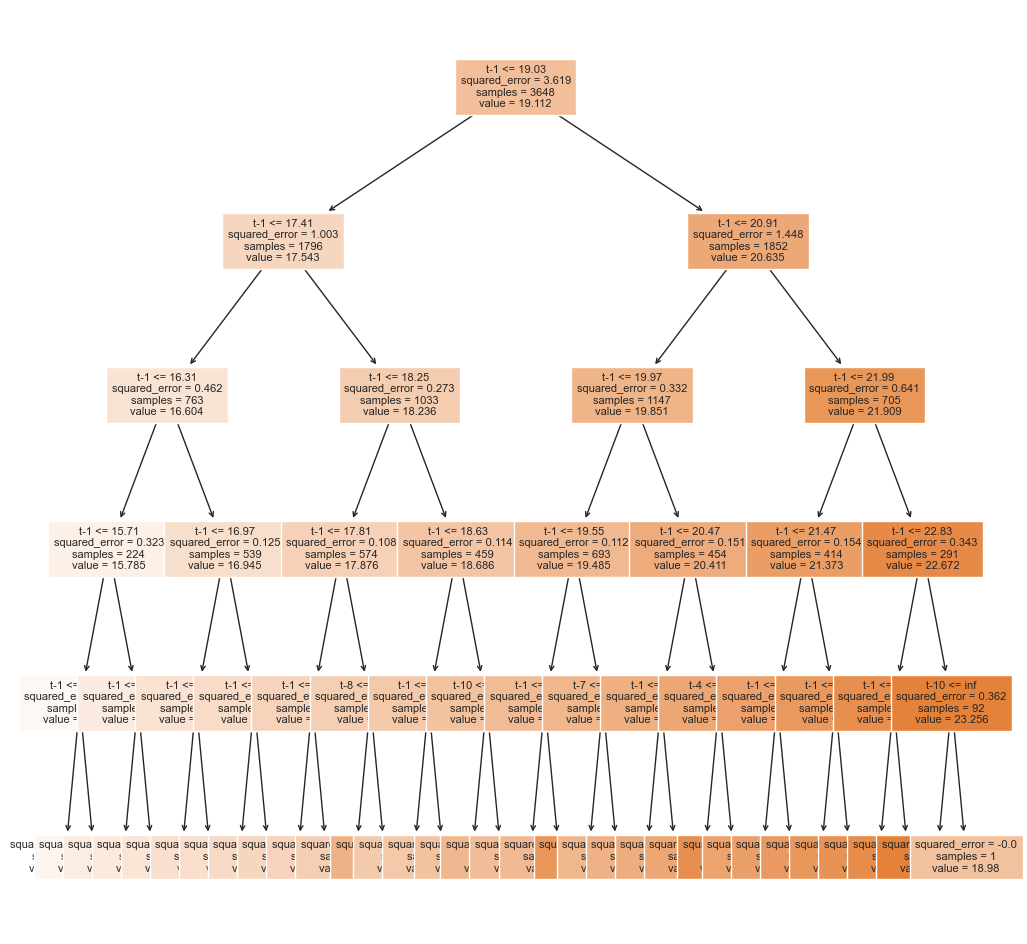

In [51]:
# Configurar y mostrar el gráfico del árbol de decisión
plt.figure(figsize=(12, 12))
_ = tree.plot_tree(AperturaDT1, 
                   feature_names=listacaract, 
                   fontsize= 8,
                   filled=True)

# Mostrar el gráfico
plt.show()

In [52]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

2622
2622
656
656


In [53]:
indicetrian_val_test=df1.index
print(indicetrian_val_test.size)
indicetrain_val=indicetrian_val_test[0:2622]
indicetest=indicetrian_val_test[2622:3648]

3648


In [54]:
print(indicetrain_val.size)
print(indicetest.size)

2622
1026


In [55]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

3278
3278


In [56]:
# Recortar el índice para que coincida con la longitud de los datos
indicetrian_val_test_recortado = indicetrian_val_test[:3278]

# Crear el DataFrame utilizando los datos y el índice recortados
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred = pd.DataFrame(data=d, index=indicetrian_val_test_recortado)

# Mostrar el DataFrame resultante
print(ObsvsPred.head(10))

            observado  Predicción
Fecha                            
2010-01-04      19.36   19.261558
2010-01-05      19.36   19.261558
2010-01-06      19.26   19.261558
2010-01-07      19.50   19.261558
2010-01-08      19.58   19.462609
2010-01-09      20.62   19.703429
2010-01-10      20.62   20.585161
2010-01-11      20.62   20.585161
2010-01-12      20.50   20.585161
2010-01-13      20.46   20.585161


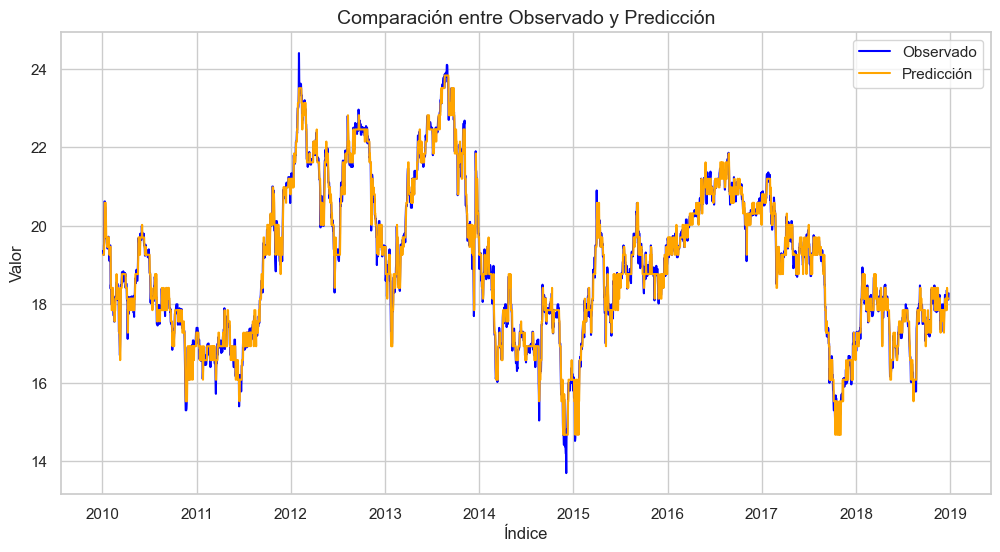

In [57]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred['observado'], label='Observado', color='blue', linestyle='-')
plt.plot(ObsvsPred['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


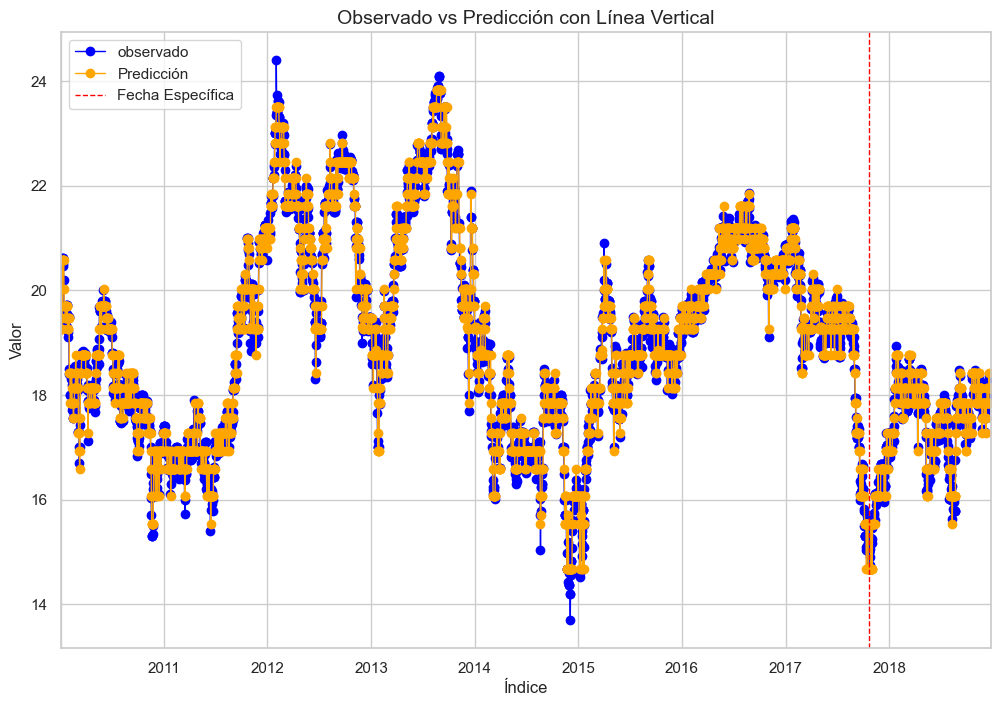

In [58]:
import matplotlib.pyplot as plt

# Configuración del gráfico utilizando Pandas plot y Matplotlib
ax = ObsvsPred.plot(marker="o", figsize=(12, 8), color=['blue', 'orange'], linewidth = 1)  # Cambiar colores de 'observado' y 'predicción'

# Añadir línea vertical en una fecha específica
fecha_vertical = indicetrian_val_test[2848].date()  # Fecha específica para la línea vertical
ax.axvline(x=fecha_vertical, color='red', linestyle='--', linewidth = 1, label='Fecha Específica')

# Ajustar etiquetas y título del gráfico
plt.title('Observado vs Predicción con Línea Vertical', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Añadir leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

<center><h1 style="color: #011f4b;">ÁRBOLES DE DEDICIÓN SERIE SIN TENDENCIA (KERNEL) </h1></center>

In [59]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [60]:
STK = sin_tendencia_kernel
print(STK.head())
type(STK)

Fecha
2010-01-04   -0.008985
2010-01-05    0.008776
2010-01-06   -0.005587
2010-01-07    0.004249
2010-01-08    0.000064
Name: BoxCox, dtype: float64


pandas.core.series.Series

In [61]:
STK.size

3648

In [62]:
STK_Df = pd.DataFrame(sin_tendencia_kernel)
print(STK_Df.head())
print(STK_Df.size)
print(type(STK_Df))

              BoxCox
Fecha               
2010-01-04 -0.008985
2010-01-05  0.008776
2010-01-06 -0.005587
2010-01-07  0.004249
2010-01-08  0.000064
3648
<class 'pandas.core.frame.DataFrame'>


In [63]:
df1 = pd.DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [64]:
# Generar los primeros 7 rezagos
for i in range(7, 0, -1):
    df1['t-'+str(i)] = STK.shift(i)

# Generar rezagos que son múltiplos de 7 hasta 70
for i in range(14, 71, 7):
    df1['t-'+str(i)] = STK.shift(i)

In [65]:
# Crear la columna 't' con los valores originales de la serie de tiempo
df1['t'] = STK.values

# Imprimir el DataFrame resultante
print(df1.head(13))

                     t-7           t-6           t-5           t-4  \
Fecha                                                                
2010-01-04           NaN           NaN           NaN           NaN   
2010-01-05           NaN           NaN           NaN           NaN   
2010-01-06           NaN           NaN           NaN           NaN   
2010-01-07           NaN           NaN           NaN           NaN   
2010-01-08           NaN           NaN           NaN -8.985262e-03   
2010-01-09           NaN           NaN -8.985262e-03  8.775847e-03   
2010-01-10           NaN -8.985262e-03  8.775847e-03 -5.587324e-03   
2010-01-11 -8.985262e-03  8.775847e-03 -5.587324e-03  4.249207e-03   
2010-01-12  8.775847e-03 -5.587324e-03  4.249207e-03  6.431514e-05   
2010-01-13 -5.587324e-03  4.249207e-03  6.431514e-05 -5.823016e-08   
2010-01-14  4.249207e-03  6.431514e-05 -5.823016e-08 -1.263095e-04   
2010-01-15  6.431514e-05 -5.823016e-08 -1.263095e-04 -8.423408e-03   
2010-01-16 -5.823016

In [66]:
# Filtrar filas para eliminar aquellas con valores NaN (debido a los rezagos)
df2 = df1.dropna()

# Mostrar el DataFrame resultante
print(df2)

                 t-7       t-6       t-5       t-4       t-3       t-2  \
Fecha                                                                    
2010-03-15 -0.000546  0.002282 -0.003720  0.004021 -0.002290 -0.000083   
2010-03-16  0.002282 -0.003720  0.004021 -0.002290 -0.000083 -0.003198   
2010-03-17 -0.003720  0.004021 -0.002290 -0.000083 -0.003198  0.002027   
2010-03-18  0.004021 -0.002290 -0.000083 -0.003198  0.002027  0.000829   
2010-03-19 -0.002290 -0.000083 -0.003198  0.002027  0.000829 -0.005101   
...              ...       ...       ...       ...       ...       ...   
2019-12-26  0.006055 -0.002687 -0.000132 -0.006022  0.008160 -0.002019   
2019-12-27 -0.002687 -0.000132 -0.006022  0.008160 -0.002019 -0.000306   
2019-12-28 -0.000132 -0.006022  0.008160 -0.002019 -0.000306  0.002116   
2019-12-29 -0.006022  0.008160 -0.002019 -0.000306  0.002116 -0.001810   
2019-12-30  0.008160 -0.002019 -0.000306  0.002116 -0.001810 -0.000064   

                 t-1      t-14      t

In [67]:
# Dividir los datos en características (X1) y etiquetas (y1)
df3 = df2.values
X1 = df3[:, :-1]  # Todas las columnas excepto la última
y1 = df3[:, -1]   # Solo la última columna

# Imprimir los conjuntos de características y etiquetas
print(X1)
print(y1)

[[-5.46294554e-04  2.28181956e-03 -3.72018286e-03 ... -2.03479878e-02
  -8.42340813e-03 -8.98526160e-03]
 [ 2.28181956e-03 -3.72018286e-03  4.02106147e-03 ...  5.12413502e-03
   5.57209462e-03  8.77584651e-03]
 [-3.72018286e-03  4.02106147e-03 -2.28995864e-03 ...  5.30821330e-03
  -1.24707418e-03 -5.58732426e-03]
 ...
 [-1.32357847e-04 -6.02173264e-03  8.15956290e-03 ...  1.35862307e-05
   8.96214933e-08  7.10944443e-05]
 [-6.02173264e-03  8.15956290e-03 -2.01947207e-03 ... -2.68863733e-05
   3.72921409e-04  6.50088630e-04]
 [ 8.15956290e-03 -2.01947207e-03 -3.06008269e-04 ... -1.64881335e-03
   4.51527483e-03  7.13245933e-04]]
[ 2.02696339e-03  8.28967886e-04 -5.10059952e-03 ... -6.37030985e-05
 -2.38653173e-03  2.90327502e-03]


In [68]:
print(X1[1])
print(y1[1])

[ 2.28181956e-03 -3.72018286e-03  4.02106147e-03 -2.28995864e-03
 -8.27934998e-05 -3.19777133e-03  2.02696339e-03 -3.17817676e-03
 -5.54208555e-03 -3.16864448e-03 -2.13109598e-03  3.12991675e-03
 -6.06910640e-03  5.12413502e-03  5.57209462e-03  8.77584651e-03]
0.0008289678857007488


In [69]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 3578
2504 357 715
Train + Validation + Test: 3576


In [70]:
Y1 = y1
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1  #Set split
testtarget_size = int(len(Y1) * 0.20)   #Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 3578
Training Observations for Target: 2504
Validation Observations for Target: 358
Test Observations for Target: 716


In [71]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 3578
Training Observations for Feature: 2504
Validation Observations for Feature: 358
Test Observations for Feature: 716


In [72]:
from sklearn.tree import DecisionTreeRegressor

DT1_Apertura = DecisionTreeRegressor() 
DT1_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: -7737929.991924736
Coeficiente R2 sobre el conjunto de Validación: -16445348.54492405
el RECM sobre validación es: 243.36001164521522


**CORREGIR**

- El R^2 = 1 indica que el modelo está ajustando perfectamente a los datos de entrenamiento, esto significa que el modelo puede explicar el 100% de la variabilidad en este conjunto; sin embargo, esto puede ser señal de sobre ajuste
- El R^2 en el conjunto de validación es considerablemente más bajo que en el conjunto de entrenamiento (0.594 vs 1.0). Esto sugiere que el modelo no generaliza bien a nuevos datos. Aunque todavía está capturando una cantidad significativa de variabilidad (alrededor del 59.4%), la caída en el desempeño comparado con el conjunto de entrenamiento es un indicio de que el modelo podría estar sobre ajustado.
- El RECM (Raíz del Error Cuadrático Medio) es una medida de la magnitud promedio del error de las predicciones del modelo en el conjunto de validación. Un RECM más bajo indica mejores predicciones. En este caso, el RECM de 0.124789 sugiere que, en promedio, las predicciones del modelo están desviándose en alrededor de 0.125 unidades del valor real en el conjunto de validación.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convertir val_target a una serie de pandas
val_target_series = pd.Series(val_target)

# Calcular la media y desviación estándar
train_mean = np.mean(train_target)
train_std = np.std(train_target)
val_mean = np.mean(val_target)
val_std = np.std(val_target)

print(f"Media de entrenamiento: {train_mean}")
print(f"Desviación estándar de entrenamiento: {train_std}")
print(f"Media de validación: {val_mean}")
print(f"Desviación estándar de validación: {val_std}")

Media de entrenamiento: 1.301408236685371e-06
Desviación estándar de entrenamiento: 0.005608053706027822
Media de validación: 1.0105416540185812e-07
Desviación estándar de validación: 0.003846830531871023


El hecho de que el RECM del modelo (0.124789) sea significativamente menor que la desviación estándar de la validación (0.554668) y menor que el RECM del modelo de persistencia (0.199976) indica que el modelo está capturando bien la variabilidad de los datos.

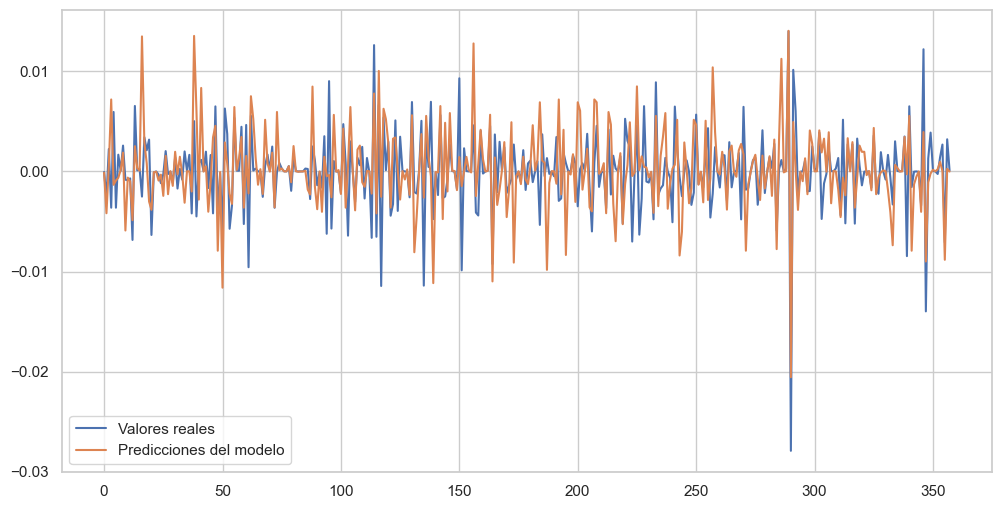

In [74]:
val_predictions = DT1_Apertura.predict(val_feature)

plt.figure(figsize=(12, 6))
plt.plot(val_target, label='Valores reales')
plt.plot(val_predictions, label='Predicciones del modelo')
plt.legend()
plt.show()

In [75]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un DataFrame para almacenar los resultados
tuning_results = pd.DataFrame(columns=['max_depth', 'steps', 'R2_train', 'R2_val', 'RMSE_val'])

# Definir los valores de max_depth y pasos que deseas probar
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9]
steps_ahead = [1, 2, 3, 4, 5, 6, 7]

# Función para crear características para pasos adelante
def create_lagged_features(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps)])
        y.append(data[i + steps])
    return np.array(X), np.array(y)

for steps in steps_ahead:
    best_rmse = float('inf')
    best_model = None
    best_params = None
    
    for depth in max_depth_values:
        print(f'{"="*12} Entrenando el modelo con max_depth={depth} y {steps} pasos adelante {"="*12}')
        
        # Crear características y objetivos para el número de pasos adelante
        train_X, train_y = create_lagged_features(train_feature.flatten(), steps)
        val_X, val_y = create_lagged_features(val_feature.flatten(), steps)

        # Crear y ajustar el modelo
        AperturaDT = DecisionTreeRegressor(max_depth=depth)
        AperturaDT.fit(train_X, train_y)

        # Evaluar el modelo
        R2_train = AperturaDT.score(train_X, train_y)
        R2_val = AperturaDT.score(val_X, val_y)
        RMSE_val = mean_squared_error(val_y, AperturaDT.predict(val_X), squared=False)

        # Almacenar los mejores resultados
        if RMSE_val < best_rmse:
            best_rmse = RMSE_val
            best_model = AperturaDT
            best_params = (depth, steps, R2_train, R2_val, RMSE_val)

    # Almacenar los mejores resultados en el DataFrame usando loc
    tuning_results.loc[len(tuning_results)] = best_params
    print(f"Mejor modelo para {steps} pasos adelante:")
    print(f"max_depth={best_params[0]}")
    print(f"Coeficiente R2 sobre el conjunto de entrenamiento: {best_params[2]}")
    print(f"Coeficiente R2 sobre el conjunto de validación: {best_params[3]}")
    print(f"RECM sobre el conjunto de validación: {best_params[4]}\n")

# Mostrar los resultados finales
print("Resultados del tuning de max_depth y pasos adelante:")
print(tuning_results)

============ Entrenando el modelo con max_depth=2 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=3 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=4 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=5 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=6 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=7 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=8 y 1 pasos adelante ============
============ Entrenando el modelo con max_depth=9 y 1 pasos adelante ============
Mejor modelo para 1 pasos adelante:
max_depth=4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.04806188261534061
Coeficiente R2 sobre el conjunto de validación: 0.042026414345489815
RECM sobre el conjunto de validación: 0.0037823909891950497

============ Entrenando el modelo con max_depth=2 y 2 pasos adelante ============
============ 

Para este caso la profundidad con mejor RCM es 5 **AQUI ES MAX_DEPTH 4, 1 STEP y MSE 0.003782**

In [76]:
# Importar la función para poda por complejidad de costo
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Obtener el mejor modelo encontrado
best_max_depth = 4  # Cambiar según el mejor resultado obtenido
best_steps = 1      # Cambiar según el mejor resultado obtenido

# Crear y ajustar el modelo con el mejor max_depth y steps
AperturaDT = DecisionTreeRegressor(max_depth=best_max_depth)
train_X, train_y = create_lagged_features(train_feature.flatten(), best_steps)
val_X, val_y = create_lagged_features(val_feature.flatten(), best_steps)
AperturaDT.fit(train_X, train_y)

# Obtener el camino de poda por complejidad de costo
path = AperturaDT.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Imprimir las alphas encontradas
print("Alphas encontradas:", ccp_alphas)
print("Alpha mínimo:", ccp_alphas.min())
print("Alpha máximo:", ccp_alphas.max())

# Definir el número de divisiones para explorar las alphas
div = 25

Alphas encontradas: [0.00000000e+00 3.58509730e-09 1.60790087e-08 1.77762796e-08
 1.84746344e-08 2.71910642e-08 4.31024415e-08 7.52349722e-08
 8.23282237e-08 1.82206286e-07 3.28080471e-07 6.04009508e-07]
Alpha mínimo: 0.0
Alpha máximo: 6.040095082849298e-07


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Obtener el camino de poda por complejidad de costo
path = AperturaDT.cost_complexity_pruning_path(train_feature, train_target)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Lista para almacenar los RMSE de entrenamiento y prueba
rmse_train, rmse_test = [], []

# Iterar sobre los valores de alpha
for alpha in ccp_alphas:
    # Crear y ajustar el modelo con el valor de alpha actual
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(train_feature, train_target)
    
    # Predecir sobre conjunto de entrenamiento y validación
    y_train_pred = tree.predict(train_feature)
    y_val_pred = tree.predict(val_feature)

    # Calcular el RMSE
    rmse_train.append(np.sqrt(mean_squared_error(train_target, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(val_target, y_val_pred)))

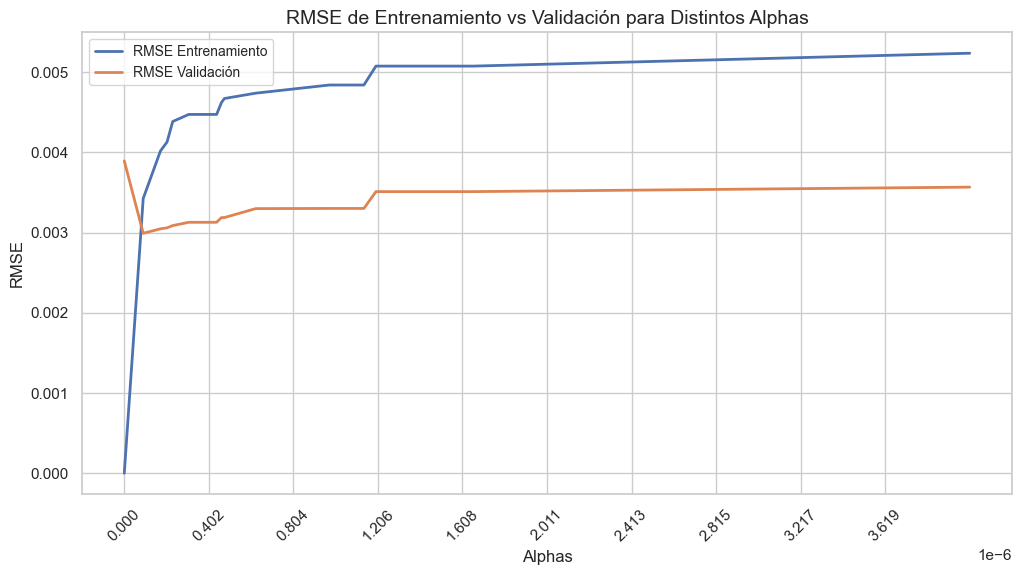

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura y un eje de tamaño adecuado
plt.figure(figsize=(12, 6))

# Graficar las líneas de entrenamiento y prueba
sns.lineplot(x=ccp_alphas, y=rmse_train, label="RMSE Entrenamiento", linewidth=2)
sns.lineplot(x=ccp_alphas, y=rmse_test, label="RMSE Validación", linewidth=2)

# Personalizar etiquetas y título
plt.xlabel("Alphas", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE de Entrenamiento vs Validación para Distintos Alphas", fontsize=14)

# Configurar la leyenda
plt.legend(fontsize=10)

# Ajustar las marcas del eje x para que sean más legibles
div = 10  # Divisor para determinar la cantidad de marcas en el eje x
plt.xticks(np.arange(0.00, ccp_alphas.max(), (ccp_alphas.max() - ccp_alphas.min()) / div), rotation=45)

# Mostrar el gráfico
plt.show()

Este gráfico nos indica como varía la precisión del modelo en los datos de prueba y entrenamiento a medida que cambian los valores de alpha. Al ver que las curvas o las líneas son ascendente para ambos conjuntos podemos concluir que el modelo mejora su rendimiento al aumentar los valores de alpha, al parecer no existe una brecha significativa por lo que podemos inferir que no existe un sobre ajuste en el modelo.

In [79]:
####
print(train_feature.shape)
print(val_feature.shape)

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)

(2504, 16)
(358, 16)
(2504,)
(358,)
(2862, 16)
(2862,)


In [80]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth
AperturaDT2 = DecisionTreeRegressor(max_depth=4)  

# Ajustar el modelo con los datos de entrenamiento y validación combinados
AperturaDT2.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction = AperturaDT2.predict(train_val_feature)
test_prediction = AperturaDT2.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse = sklearn.metrics.mean_squared_error(train_val_prediction, train_val_target, squared=False)
test_rmse = sklearn.metrics.mean_squared_error(test_prediction, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse)

Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 0.004241619086781896
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.004056201142373603


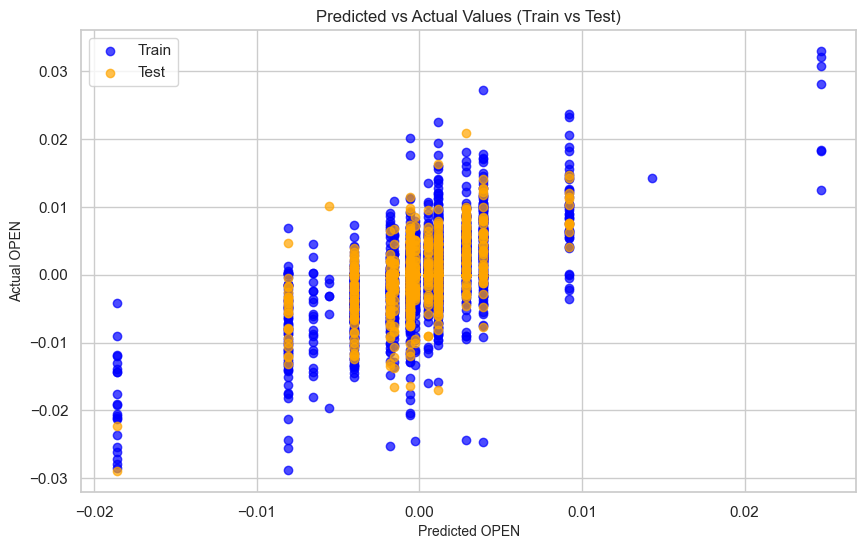

In [81]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=12)
plt.xlabel('Predicted OPEN', fontsize=10)
plt.ylabel('Actual OPEN', fontsize=10)
plt.legend()

# Mostrar el gráfico
plt.show()

In [82]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth 
AperturaDT3 = DecisionTreeRegressor(ccp_alpha= 0.402)  # Rellena aquí el mejor alpha de poda

# Ajustar el modelo con los datos de entrenamiento y validación combinados
AperturaDT3.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction_prun_mincost = AperturaDT3.predict(train_val_feature)
test_prediction_prun_mincost = AperturaDT3.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse_prun_mincost = sklearn.metrics.mean_squared_error(train_val_prediction_prun_mincost, train_val_target, squared=False)
test_rmse_prun_mincost = sklearn.metrics.mean_squared_error(test_prediction_prun_mincost, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse_prun_mincost)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse_prun_mincost)

Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 0.005419159693391843
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.004923317192955292


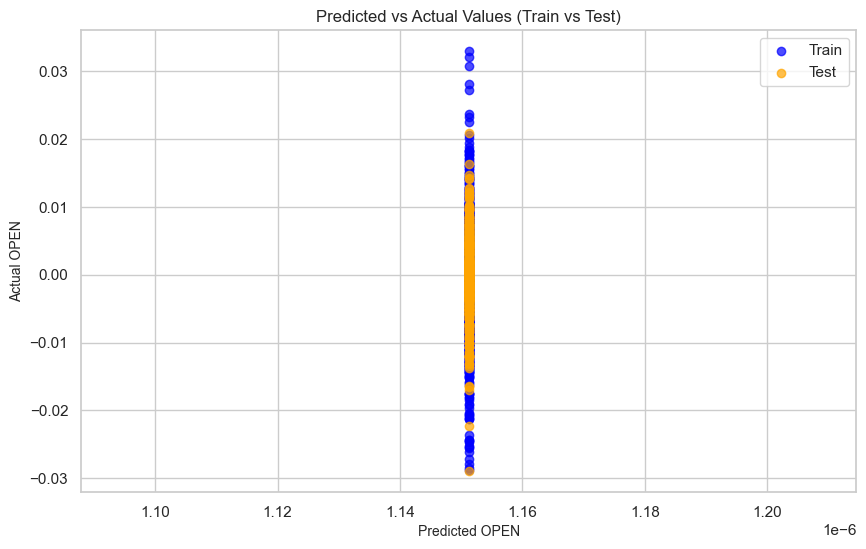

In [83]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction_prun_mincost, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction_prun_mincost, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=12)
plt.xlabel('Predicted OPEN', fontsize=10)
plt.ylabel('Actual OPEN', fontsize=10)
plt.legend()

# Mostrar el gráfico
plt.show()

In [84]:
from sklearn import tree
import matplotlib.pyplot as plt

# Lista de características y respuesta
listacaract = list(df1.columns.values)
respuesta = listacaract.pop()  # Suponemos que 'respuesta' es el nombre de la columna que quieres predecir

# Crear el árbol de decisión
AperturaDT1 = DecisionTreeRegressor(max_depth= 4)  # Aquí debes definir tu modelo DecisionTreeRegressor
AperturaDT1.fit(df1[listacaract], df1[respuesta])

# Mostrar el texto de representación del árbol
text_representation = tree.export_text(AperturaDT1)
print(text_representation)

|--- feature_6 <= 0.00
|   |--- feature_6 <= -0.01
|   |   |--- feature_5 <= -0.00
|   |   |   |--- feature_6 <= -0.02
|   |   |   |   |--- value: [0.02]
|   |   |   |--- feature_6 >  -0.02
|   |   |   |   |--- value: [0.01]
|   |   |--- feature_5 >  -0.00
|   |   |   |--- feature_6 <= -0.01
|   |   |   |   |--- value: [0.01]
|   |   |   |--- feature_6 >  -0.01
|   |   |   |   |--- value: [0.00]
|   |--- feature_6 >  -0.01
|   |   |--- feature_6 <= -0.00
|   |   |   |--- feature_5 <= 0.00
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_5 >  0.00
|   |   |   |   |--- value: [0.00]
|   |   |--- feature_6 >  -0.00
|   |   |   |--- feature_6 <= 0.00
|   |   |   |   |--- value: [-0.00]
|   |   |   |--- feature_6 >  0.00
|   |   |   |   |--- value: [0.00]
|--- feature_6 >  0.00
|   |--- feature_6 <= 0.01
|   |   |--- feature_5 <= -0.00
|   |   |   |--- feature_6 <= 0.01
|   |   |   |   |--- value: [-0.00]
|   |   |   |--- feature_6 >  0.01
|   |   |   |   |--- value: [-0.00]
|   

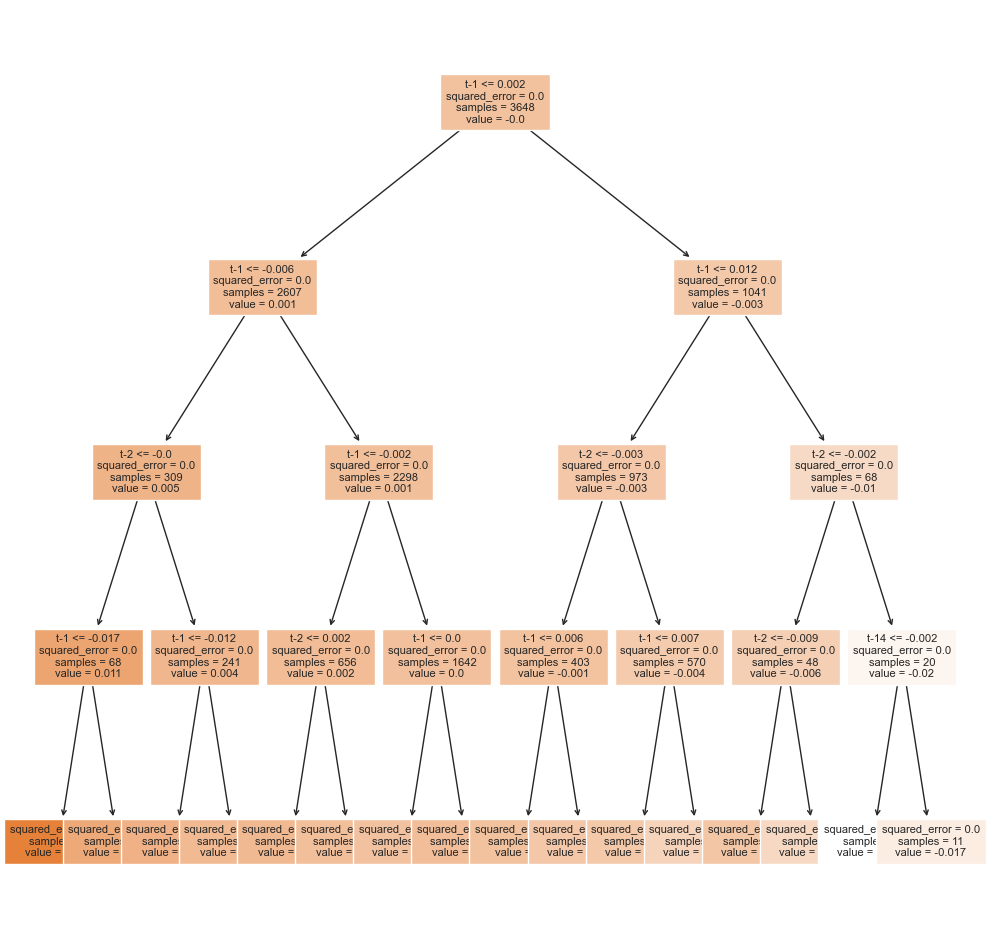

In [85]:
# Configurar y mostrar el gráfico del árbol de decisión
plt.figure(figsize=(12, 12))
_ = tree.plot_tree(AperturaDT1, 
                   feature_names=listacaract, fontsize = 8, 
                   filled=True)

# Mostrar el gráfico
plt.show()

In [86]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

2862
2862
716
716


In [87]:
indicetrian_val_test=df1.index
print(indicetrian_val_test.size)
indicetrain_val=indicetrian_val_test[0:2622]
indicetest=indicetrian_val_test[2622:3648]

3648


In [88]:
print(indicetrain_val.size)
print(indicetest.size)

2622
1026


In [89]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

3578
3578


In [90]:
# Recortar el índice para que coincida con la longitud de los datos
indicetrian_val_test_recortado = indicetrian_val_test[:3578]

# Crear el DataFrame utilizando los datos y el índice recortados
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred = pd.DataFrame(data=d, index=indicetrian_val_test_recortado)

# Mostrar el DataFrame resultante
print(ObsvsPred.head(10))

            observado  Predicción
Fecha                            
2010-01-04   0.002027    0.002888
2010-01-05   0.000829   -0.000283
2010-01-06  -0.005101    0.001157
2010-01-07   0.005123    0.002888
2010-01-08   0.000363   -0.000283
2010-01-09   0.000004    0.001157
2010-01-10   0.000086   -0.000612
2010-01-11   0.005618    0.001157
2010-01-12  -0.009914   -0.004055
2010-01-13   0.006728    0.003890


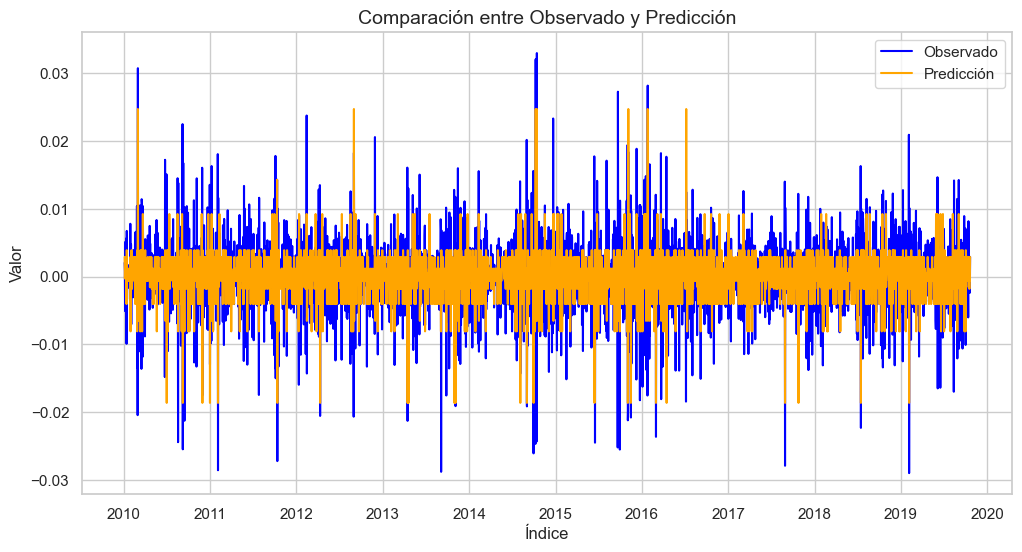

In [91]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred['observado'], label='Observado', color='blue', linestyle='-')
plt.plot(ObsvsPred['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

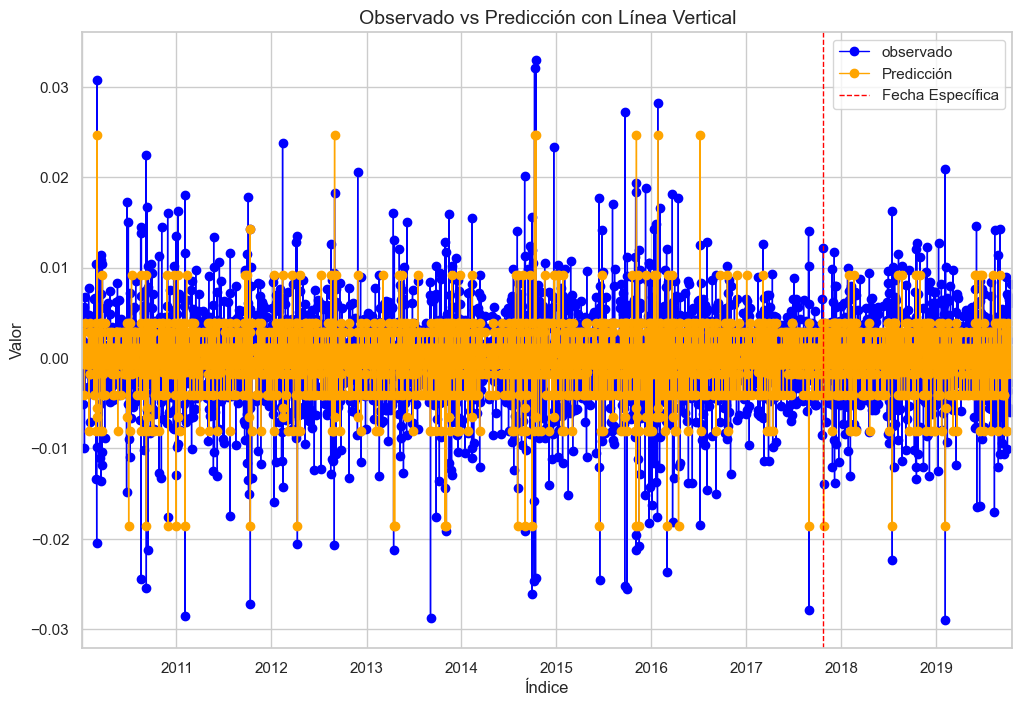

In [92]:
import matplotlib.pyplot as plt

# Configuración del gráfico utilizando Pandas plot y Matplotlib
ax = ObsvsPred.plot(marker="o", figsize=(12, 8), linewidth= 1, color=['blue', 'orange'])  # Cambiar colores de 'observado' y 'predicción'

# Añadir línea vertical en una fecha específica
fecha_vertical = indicetrian_val_test[2848].date()  # Fecha específica para la línea vertical
ax.axvline(x=fecha_vertical, color='red', linestyle='--', linewidth=1, label='Fecha Específica')

# Ajustar etiquetas y título del gráfico
plt.title('Observado vs Predicción con Línea Vertical', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Añadir leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

Ahora, para deshacer las transformaciones hechas a la serie y visualizar el resultado en la escala original procedemos a realizar las operaciones inversas a las que hemos aplicado tanto para la serie orginal como para las predicciones. 
 - Para empezar podemos tomar la serie BoxCox antes de la sustracción de la tendencia por Kernel
 - En segundo lugar se hace la operacion inversa de la transformacion de BoxCox

In [94]:
from scipy.special import inv_boxcox

# Si tu lambda original era lambda_boxcox
lambda_boxcox = 0.17071798004770206  
series_original = inv_boxcox(serie_boxcox, lambda_boxcox)
print(series_original)

[18.98 19.5  19.4  ... 18.12 18.12 18.28]


In [95]:
ObsvsPred['Predicción'].shape

(3578,)

In [96]:
trend_kernel.shape

(3648,)

In [97]:
PredCT = ObsvsPred['Predicción'] + trend_kernel[70:]
print(PredCT)

Fecha
2010-01-04    3.852560
2010-01-05    3.857446
2010-01-06    3.866526
2010-01-07    3.890269
2010-01-08    3.893540
                ...   
2019-10-17    3.755789
2019-10-18    3.747680
2019-10-19    3.747139
2019-10-20    3.749461
2019-10-21    3.762098
Name: Predicción, Length: 3578, dtype: float64


In [98]:
PredOrig = inv_boxcox(PredCT, lambda_boxcox)
print(PredOrig)

Fecha
2010-01-04    19.310030
2010-01-05    19.367014
2010-01-06    19.473284
2010-01-07    19.753460
2010-01-08    19.792318
                ...    
2019-10-17    18.209712
2019-10-18    18.119924
2019-10-19    18.113943
2019-10-20    18.139619
2019-10-21    18.279832
Name: Predicción, Length: 3578, dtype: float64


In [99]:
d_original = {'observado_original': series_original[70:], 'Predicción': PredOrig}
ObsvsPred_original = pd.DataFrame(data=d_original, index=indicetrian_val_test_recortado)

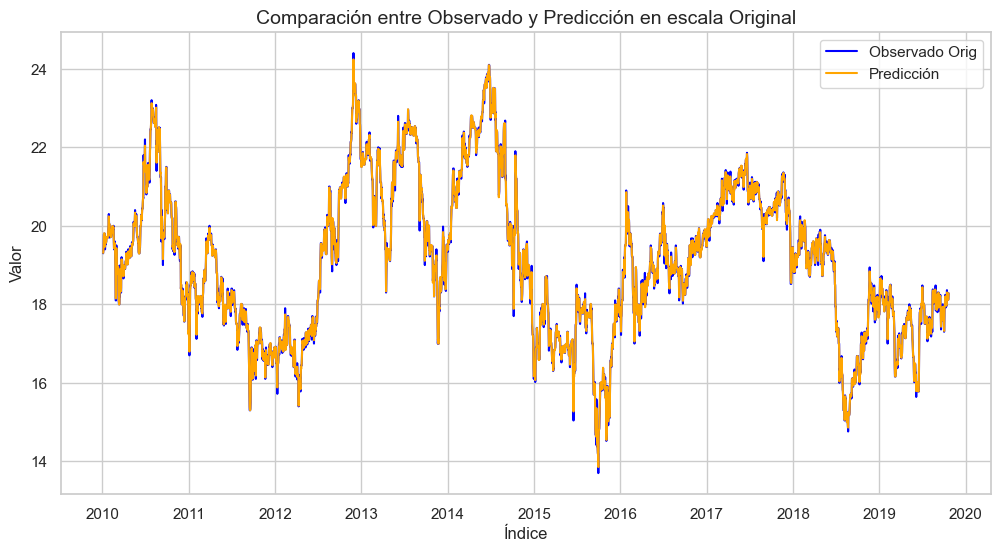

In [100]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred_original['observado_original'], label='Observado Orig', color='blue', linestyle='-')
plt.plot(ObsvsPred_original['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción en escala Original', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Se puede concluir después de haber probado ambos caminos en referencia a empezar desde la Serie Original o desde la Serie transformada vía BoxCox y luego eliminando la tendencia vía regresión Kernel, que el modelo que mejor ajusto de estos 2 fue el 2do, cosa que además podemos visualizar de una forma más numérica comparando el MSE obtenido de ambos modelos tanto para los conjuntos de prueba como entrenamiento en el cual el modelo de la serie sin tendencia supero o en otras palabras el MSE fue menor en este. 

Sin embargo, aún no estamos seguros de que el modelo de árboles sea la mejor opción para modelar nuestra serie, por eso a continuación se muestran otros modelos. 